In [270]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

#Load the data
train_in = pd.read_csv('train_in - Copy.csv', header=None)
train_out = pd.read_csv('train_out - Copy.csv', header=None)
test_in = pd.read_csv('test_in - Copy.csv', header=None)
test_out = pd.read_csv('test_out - Copy.csv', header=None)

# Convert data to numpy arrays
train_in= train_in.to_numpy()
train_out = train_out.to_numpy().flatten()
test_in= test_in.to_numpy()
test_out = test_out.to_numpy().flatten()

In [271]:
def train(T_train, train_out, W, alpha):

    # Prediction with current W
    predictions=np.argmax(np.dot(T_train, W),axis=1)
    
    # The label of train_out, with size of (n_samples, 10). For i-th data, if it's j, Label_Matrix [i,j]=1. everywhere else is 0 in Label_Matrix
    Label_Matrix=np.zeros((len(train_out),10))
    Label_Matrix[np.arange(len(train_out)),train_out]=1
    
    # The label of predictions, with size of (n_samples, 10). For i-th data, if it's j, Predictions_Matrix [i,j]=1. everywhere else is 0 in Predictions_Matrix
    Predictions_Matrix=np.zeros((len(predictions),10))
    Predictions_Matrix[np.arange(len(predictions)),predictions]=1
    
    # calculate (y_true - y_pred)
    delta_Matrix=Label_Matrix-Predictions_Matrix
    
    # update W for regular weights
    W[:-1,:]+=2*alpha*np.dot(T_train[:,:-1].T,delta_Matrix)
    
    # update W for bias
    W[-1,:]+=2*alpha*np.sum(delta_Matrix,axis=0)
    
    accuray=np.mean(predictions == train_out)

    return W, accuray

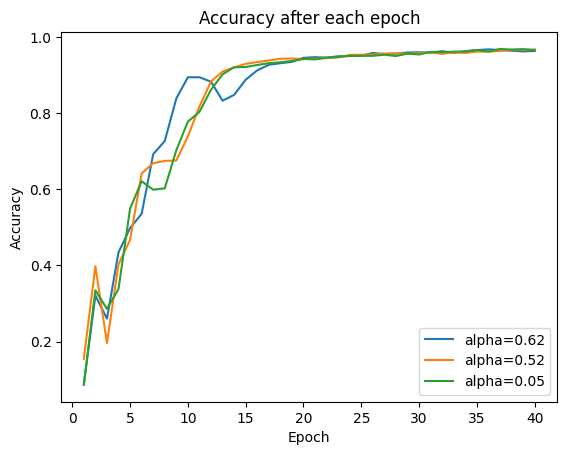

In [272]:
alpha=np.random.rand(3)# learning rates
epochs=40

#Initialize
#W=np.zeros((3,257,10))
#W=np.ones((3,257,10))
W=np.random.rand(3,257,10)
Accuracy=np.zeros((3,epochs))

#Train
T_train=np.hstack([train_in, np.ones((len(train_in), 1))])
for i in range(epochs):
    W[0], Accuracy[0][i]=train(T_train, train_out, W[0], alpha[0])
    W[1], Accuracy[1][i]=train(T_train, train_out, W[1], alpha[1])
    W[2], Accuracy[2][i]=train(T_train, train_out, W[2], alpha[2])

#select the best prediction
best_index=np.argmax([Accuracy[0][epochs-1], Accuracy[1][epochs-1], Accuracy[2][epochs-1]])
W_best=W[best_index]
#plot
plt.plot(np.arange(1,epochs+1),Accuracy[0],label=f'alpha={alpha[0]:.2f}')
plt.plot(np.arange(1,epochs+1),Accuracy[1],label=f'alpha={alpha[1]:.2f}')
plt.plot(np.arange(1,epochs+1),Accuracy[2],label=f'alpha={alpha[2]:.2f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy after each epoch')
plt.legend()
plt.show()

In [273]:
#Predictions for the training set
train_predictions=np.argmax(np.dot(T_train, W_best), axis=1)

con_ma_train=confusion_matrix(train_out, train_predictions)#confusion_matrix for training set
Overall_accuracy_train=np.trace(con_ma_train/len(train_in))#total accuracy for the training set
accuracy_train=con_ma_train.diagonal()/con_ma_train.sum(axis=1)#accuracy in each digits for the training set

Least_acc_train=np.where(accuracy_train==np.min(accuracy_train))#most difficult to classify correctly for training set

acc_ma_train=con_ma_train/con_ma_train.sum(axis=1)
error_matrix_train=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_train (trace not included)
error_ratio_train=np.max(error_matrix_train)
error_pair_train=np.where(error_matrix_train==error_ratio_train)

print(con_ma_train)
print(Overall_accuracy_train)#total accuracy for the training set
print(accuracy_train)#accuracy in each digits for the training set
print(Least_acc_train)#most difficult to classify correctly
print(error_pair_train)#most common mistaken pair for Nearest mean classifier in the training set

[[316   0   0   0   2   1   0   0   0   0]
 [  0 251   0   0   0   0   0   1   0   0]
 [  0   0 196   0   3   0   0   2   1   0]
 [  0   0   1 125   0   0   0   2   3   0]
 [  0   1   0   0 116   0   3   0   1   1]
 [  1   0   2   6   1  73   1   1   3   0]
 [  0   1   0   0   1   0 148   0   1   0]
 [  0   0   1   0   0   1   0 161   1   2]
 [  0   0   2   0   1   1   1   0 139   0]
 [  0   0   0   1   2   0   0   3   1 125]]
0.9666080843585237
[0.99059561 0.99603175 0.97029703 0.95419847 0.95081967 0.82954545
 0.98013245 0.96987952 0.96527778 0.9469697 ]
(array([5]),)
(array([3]), array([5]))


In [274]:
#Predictions for the test set
T_test=np.hstack([test_in, np.ones((len(test_in), 1))])
test_predictions=np.argmax(np.dot(T_test, W_best), axis=1)

con_ma_test=confusion_matrix(test_out, test_predictions)#confusion_matrix for test set
Overall_accuracy_test=np.trace(con_ma_test/len(test_in))
accuracy_test=con_ma_test.diagonal()/con_ma_test.sum(axis=1)

Least_acc_test=np.where(accuracy_test==np.min(accuracy_test))#most difficult to classify correctly for test set

acc_ma_test=con_ma_test/con_ma_test.sum(axis=1)
error_matrix_test=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_test (trace not included)
error_ratio_test=np.max(error_matrix_test)
error_pair_test=np.where(error_matrix_test==error_ratio_test)
print(con_ma_test)
print(Overall_accuracy_test)#total accuracy for the test set
print(accuracy_test)#accuracy in each digits for the test set
print(Least_acc_test)#most difficult to classify correctly
print(error_pair_test)#most common mistaken pair for Nearest mean classifier in the test set

[[213   0   4   1   3   0   0   0   3   0]
 [  0 113   1   2   1   0   1   3   0   0]
 [  2   0  77   3   7   1   0   1  10   0]
 [  4   0   1  67   0   2   0   1   4   0]
 [  2   1   2   1  76   2   0   1   1   0]
 [  5   0   0   8   1  38   0   1   0   2]
 [  3   0   0   1   1   3  80   0   2   0]
 [  0   0   1   1   4   0   0  57   0   1]
 [  2   0   1   3   1   2   1   4  78   0]
 [  0   1   1   1   2   1   0   8   2  72]]
0.871
[0.95089286 0.9338843  0.76237624 0.84810127 0.88372093 0.69090909
 0.88888889 0.890625   0.84782609 0.81818182]
(array([5]),)
(array([3]), array([5]))


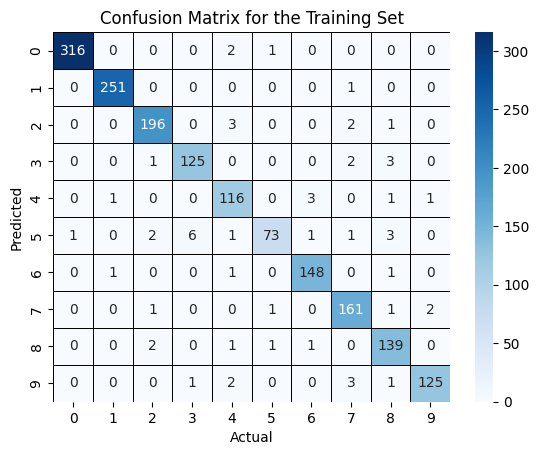

In [275]:
plt.figure()
sns.heatmap(con_ma_train, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for the Training Set')
plt.show()

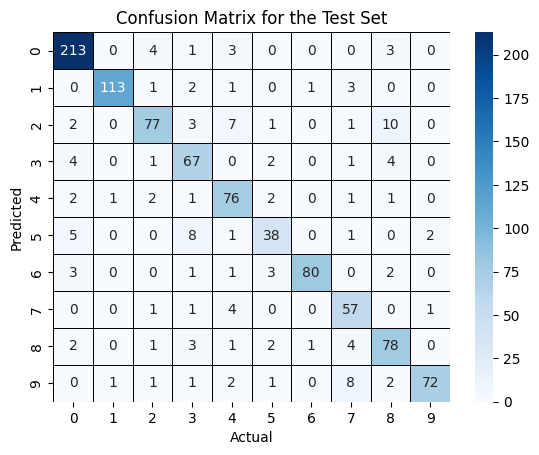

In [276]:
plt.figure()
sns.heatmap(con_ma_test, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for the Test Set')
plt.show()